#Decision Tree Regressor

🎯 Objective:


Train and evaluate a Decision Tree Regressor on synthetic data. Understand how the tree splits data and how hyperparameters impact performance.

#✅ Step 1: Import Libraries


In [66]:
# Import core libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import model and evaluation tools from sklearn
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


#✅ Step 2: Generate Synthetic Data

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


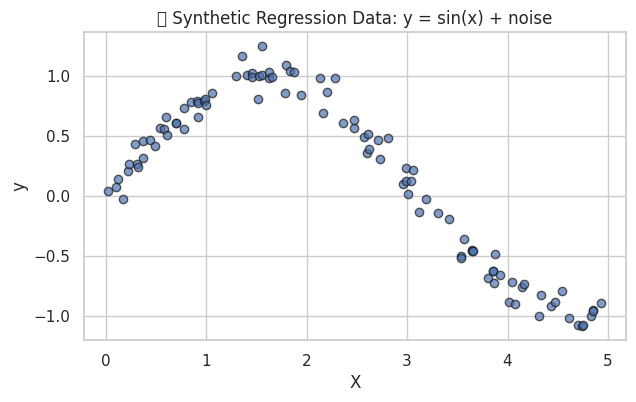

In [67]:
# Create reproducible random data
np.random.seed(42)

# Generate 1 feature with uniform random numbers and compute a non-linear target
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])  # Sinusoidal pattern with noise

# Visualize the data
plt.figure(figsize=(7, 4))
plt.scatter(X, y, edgecolor='k', alpha=0.7)
plt.title("🔬 Synthetic Regression Data: y = sin(x) + noise")
plt.xlabel("X")
plt.ylabel("y")
plt.grid(True)
plt.show()


#✅ Step 3: Train-Test Split

In [68]:
# Split into 75% train and 25% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


#✅ Step 4: Train Decision Tree Regressor

In [69]:
# Create and fit the Decision Tree Regressor
tree_model = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

#✅ Step 5: Predict and Evaluate


In [70]:
# Predict on test data
y_pred = tree_model.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print scores
print(f"📊 Mean Squared Error (MSE): {mse:.4f}")
print(f"📉 Mean Absolute Error (MAE): {mae:.4f}")
print(f"📈 R2 Score: {r2:.4f}")


📊 Mean Squared Error (MSE): 0.0145
📉 Mean Absolute Error (MAE): 0.1000
📈 R2 Score: 0.9699


#✅ Step 6: Visualize Predictions vs Actual

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


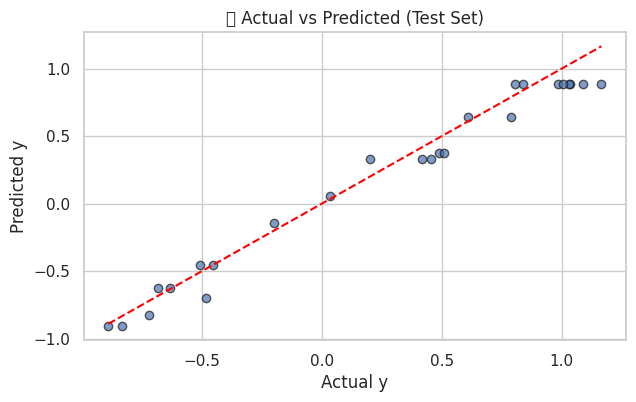

In [71]:
# Scatter plot: actual vs predicted
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred, edgecolor='k', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title("📉 Actual vs Predicted (Test Set)")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.grid(True)
plt.show()


#✅ Step 7: Visualize Regression Line on Full Data

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127795 (\N{DECIDUOUS TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


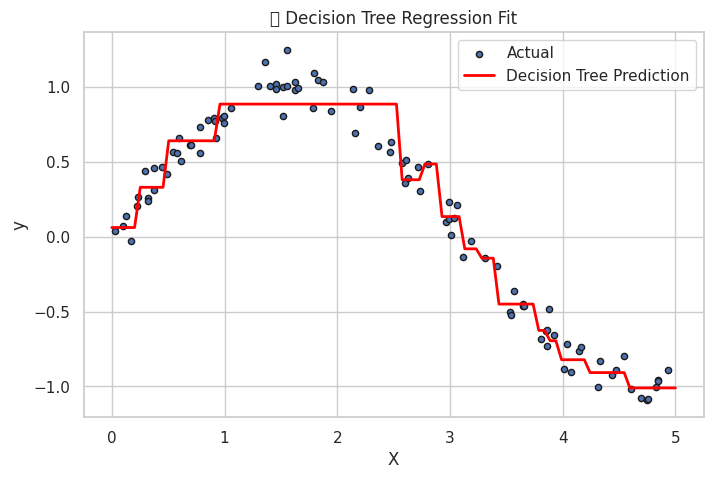

In [72]:
# Predict on the full X (sorted)
X_all = np.linspace(0, 5, 100).reshape(-1, 1)
y_all_pred = tree_model.predict(X_all)

# Plot
plt.figure(figsize=(8, 5))
plt.scatter(X, y, s=20, edgecolor="k", label="Actual")
plt.plot(X_all, y_all_pred, color="red", linewidth=2, label="Decision Tree Prediction")
plt.title("🌳 Decision Tree Regression Fit")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


#✅ Step 8: Visualize the Tree Structure

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127794 (\N{EVERGREEN TREE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


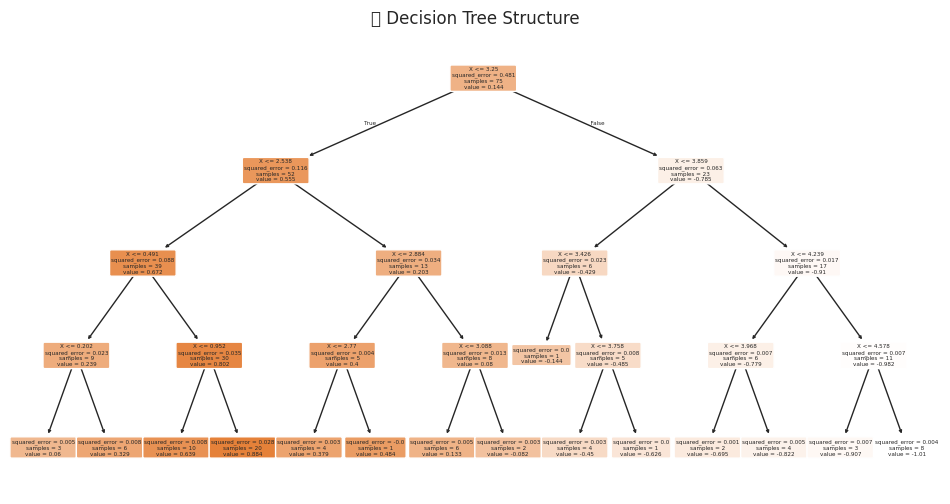

In [73]:
# Plot tree structure
plt.figure(figsize=(12, 6))
plot_tree(tree_model, filled=True, feature_names=["X"], rounded=True)
plt.title("🌲 Decision Tree Structure")
plt.show()


#🧠 Notes

| Concept       | Explanation                                                     |
| ------------- | --------------------------------------------------------------- |
| `max_depth=4` | Limits the depth of the tree to avoid overfitting               |
| `r2_score`    | Explains variance captured by the model (closer to 1 is better) |
| `plot_tree()` | Shows splits, thresholds, and leaf predictions                  |

